In [158]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing
from sklearn.preprocessing import StandardScaler

#For Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [121]:
df=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


## EDA

In [3]:
df.shape

(30, 17)

We have 30 rows and 17 columns in the dataset

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

We have all numerical data in the dataset

In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We dont have any null or missing values in the dataset

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## Observation
1. No null values
2. Outliers in ERA, SHO, SV, E

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.2 KB


We get the same information like no null values and all numerical data

## Multivariate Analysis

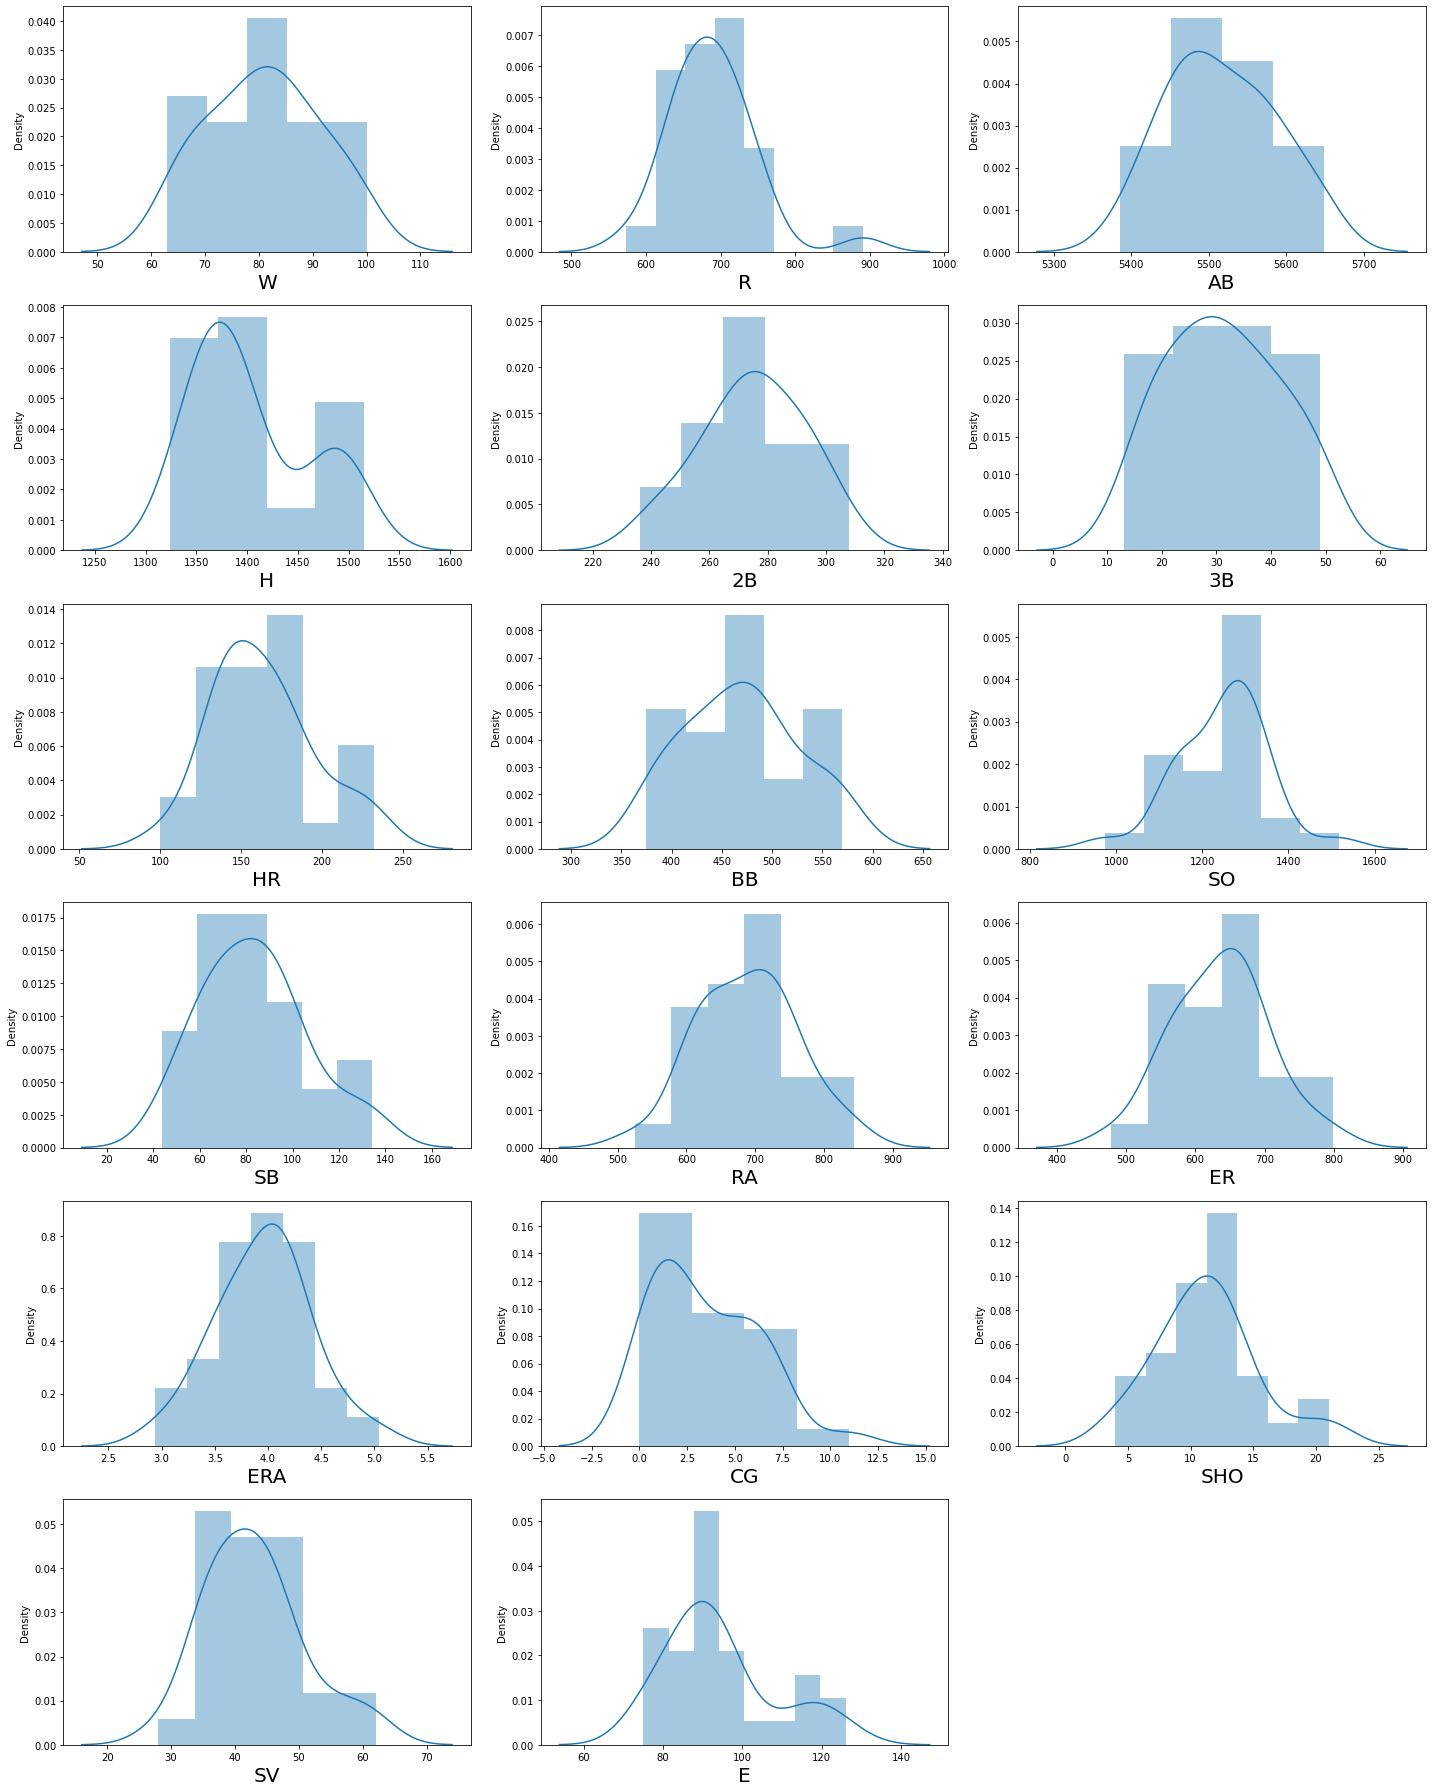

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

In [122]:
df['R']=df['R'].replace(891,df['R'].mean())

### Outlier detection

In [12]:
df_features=df[['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']]

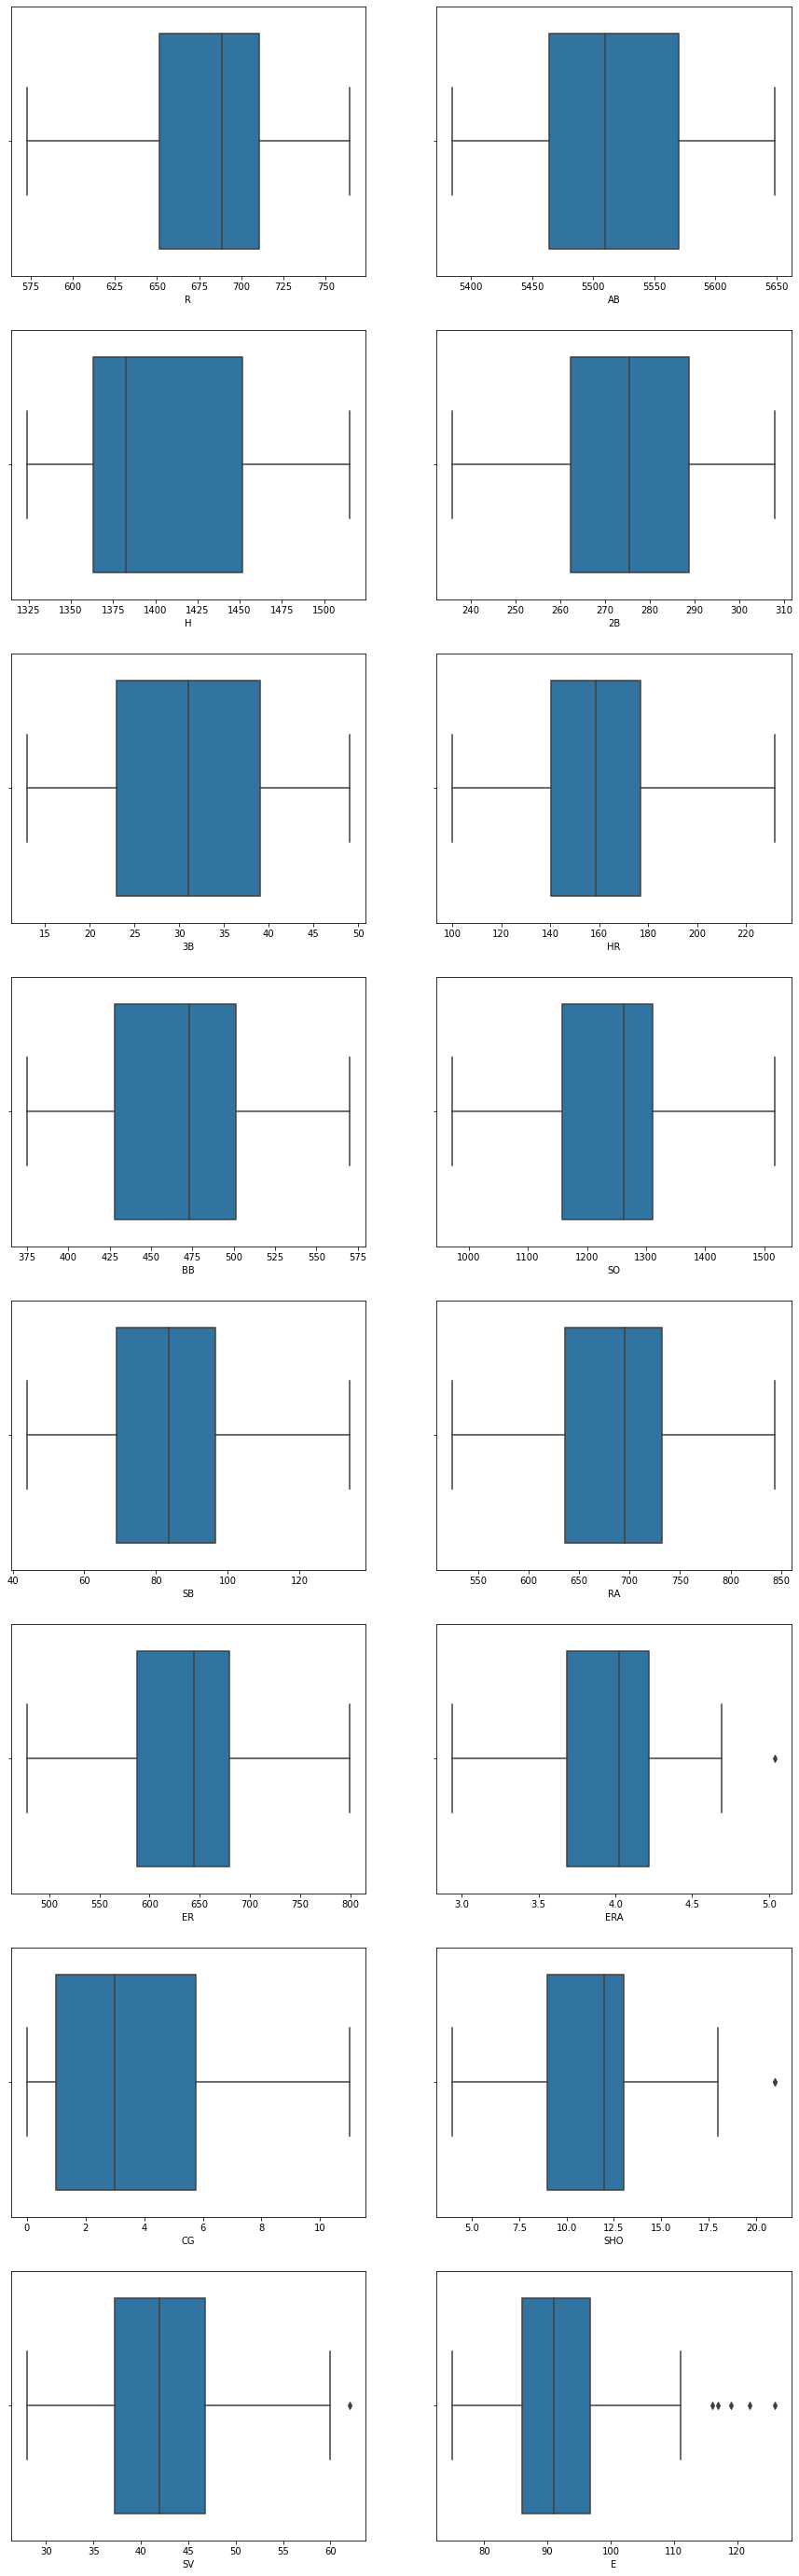

In [13]:
plt.figure(figsize=(15,50))
graph=1

for column in df_features:
    if(graph<=16):
        ax=plt.subplot(8,2,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

We have outliers present in E, SV, SHO, and ERA.

In [111]:
df.skew()

W      0.047089
R     -0.235027
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

We can see H, HR, CG, SHO, SV and E are slightly skewed

In [127]:
#finding out correlation between the features
corr=new_df.corr()
corr.shape

(17, 17)

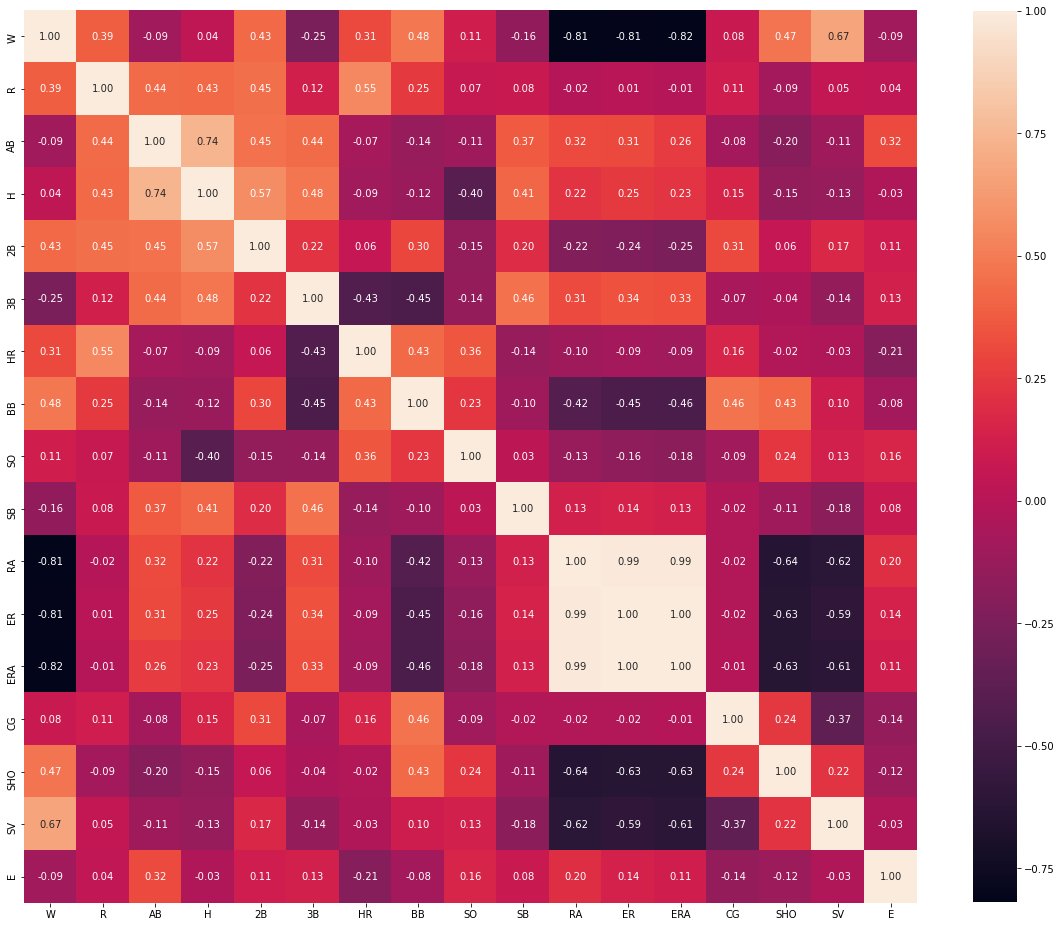

In [128]:
#plotting the heatmap of correlation between features

plt.figure(figsize=(20,20))

sns.heatmap(corr,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

We can see RA is highly correlated with ERA, ER

### Removing skewness

In [123]:
df['E']=np.log10(df['E'])
df['CG']=np.sqrt(df['CG'])
df['SHO']=np.log10(df['SHO'])
df['H']=np.log10(df['H'])
df['HR']=np.log10(df['HR'])
df['SV']=np.log10(df['SV'])

In [125]:
X=df.drop(columns=['W'],axis=1)
y=df['W']

In [126]:
#Checking multicollinearity by vif

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,4.579747,R
1,17.929713,AB
2,6.274256,H
3,3.713838,2B
4,3.020667,3B
5,5.317251,HR
6,3.390750,BB
7,2.321131,SO
8,1.907478,SB
9,180.865550,RA


In [129]:
X.drop(columns=['ERA'],axis=1,inplace=True)

Dropping ERA since highly correlated with RA

In [130]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,3.351623,R
1,3.755478,AB
2,5.272512,H
3,3.444451,2B
4,2.987498,3B
5,4.009831,HR
6,3.337496,BB
7,2.319288,SO
8,1.755918,SB
9,160.877088,RA


In [131]:
X.drop(columns=['RA'],axis=1,inplace=True)

Again dropping RA since highly correlated with ER

In [132]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,3.335513,R
1,3.708695,AB
2,5.100948,H
3,2.975974,2B
4,2.876170,3B
5,3.431472,HR
6,2.900024,BB
7,2.046673,SO
8,1.667026,SB
9,4.381095,ER


## Finding the best Random state

In [134]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.10,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.9620253164556962 on Random State 173


In [135]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.10,random_state=173)

In [136]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred))

0.7587067261907389


In [137]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(x_test)
print(r2_score(y_test,pred))

0.9620253164556962


In [138]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(x_test)
print(r2_score(y_test,pred))

0.7131593128390595


In [139]:
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
pred=knn.predict(x_test)
print(r2_score(y_test,pred))

0.650090415913201


In [140]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,Y_train)
pred=ada.predict(x_test)
print(r2_score(y_test,pred))

0.8218053044002411


## Regularization

In [141]:
from sklearn.linear_model import Lasso

In [142]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [143]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9231119390889028

## Cross validation

In [159]:
from sklearn.model_selection import cross_val_score

In [145]:
print(cross_val_score(lr,X_scaler,y,cv=5).mean())

-0.6356750168065044


In [146]:
print(cross_val_score(RFR,X_scaler,y,cv=5).mean())

-0.7514310729154122


In [147]:
print(cross_val_score(DTR,X_scaler,y,cv=5).mean())

-1.6928705227575467


In [148]:
print(cross_val_score(knn,X_scaler,y,cv=5).mean())

-0.2890012331910543


In [149]:
print(cross_val_score(ada,X_scaler,y,cv=5).mean())

-1.139958109428434


## Hyperparameter Tuning

In [152]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [155]:
Final_model=RandomForestRegressor(max_features='auto',criterion='mse')
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 78.83665461121154


## Saving Model

In [160]:
import joblib
joblib.dump(Final_model,"FinalModelBaseball.pkl")

['FinalModelBaseball.pkl']

## Loading model

In [162]:
mod=joblib.load("FinalModelBaseball.pkl")
print(mod.predict(x_test))

[84.38 76.53 91.63]
